<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_069.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test the GPU with : ``` !nvidia-smi ``` T4 GPU

In [1]:
!nvidia-smi

Thu May  8 16:53:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

The model is stabilityai/stable-video-diffusion-img2vid-xt with float16 precision to optimize computation time

In [2]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video
import cv2

In [3]:
pipe = StableVideoDiffusionPipeline.from_pretrained(
    'stabilityai/stable-video-diffusion-img2vid-xt',
    torch_dtype=torch.float16,
    variant='fp16'
)

pipe.enable_model_cpu_offload()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/984 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Saving bugs-bunny-transparent-11.png to bugs-bunny-transparent-11.png


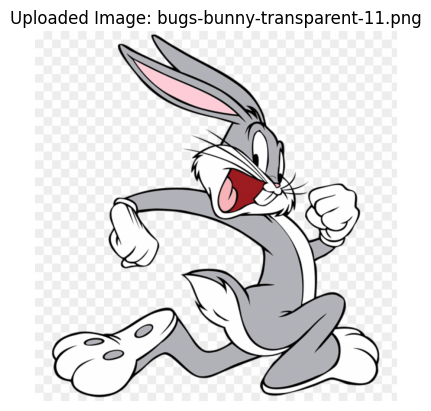

In [4]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Load and display the image
for filename in uploaded.keys():
    # Open the image using PIL
    img = Image.open(filename)

    # Display the image using Matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Uploaded Image: {filename}")
    plt.show()


In [5]:
image = load_image(filename)

# Resize the image to the appropriate dimensions
# image = image.resize((640, 480))

In [6]:
# Set a generator to control randomness
generator = torch.manual_seed(42)

# Generate the video frames
frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [7]:
export_to_video(frames, 'image_video_001.mp4', fps=7)

'image_video_001.mp4'

In [8]:
# After generating the video
files.download("image_video_001.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>